In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = 'COVID clinical trials.csv'  # Adjust this path if necessary
df = pd.read_csv(file_path)


In [3]:
# Display basic info and structure of the dataset
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys

In [4]:
# Missing Data Analysis
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100


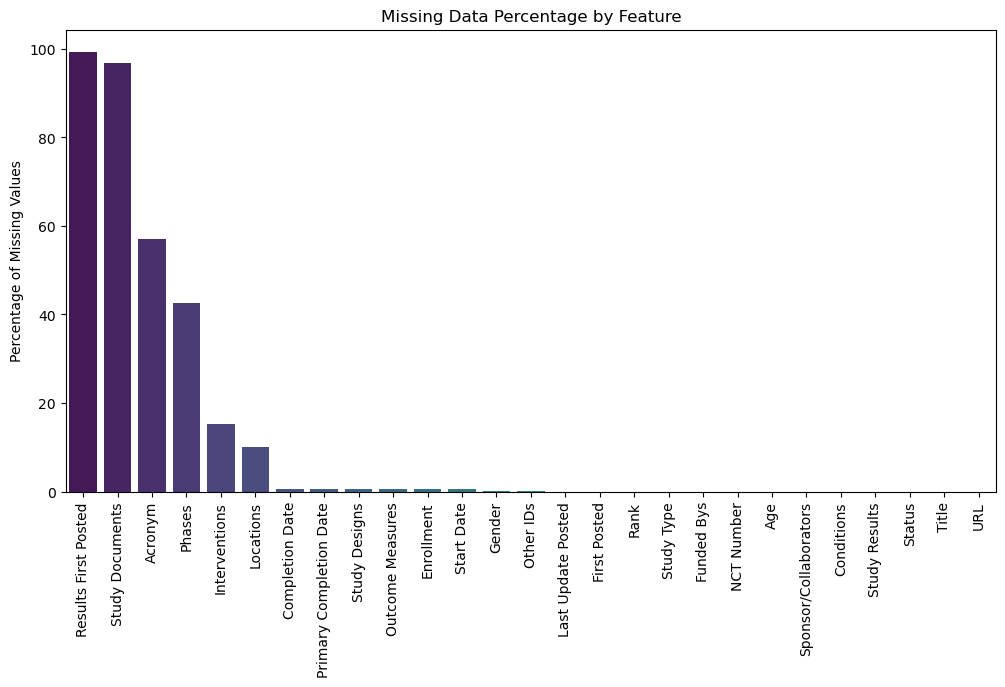

In [5]:
# Plotting missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Data Percentage by Feature')
plt.show()


In [6]:
# Dropping columns with more than 90% missing data
df_cleaned = df.drop(columns=['Results First Posted', 'Study Documents'])


In [7]:
# Convert date columns to datetime format
date_cols = ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted']
for col in date_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')



Numerical Summary:
              Rank    Enrollment
count  5783.000000  5.749000e+03
mean   2892.000000  1.831949e+04
std    1669.552635  4.045437e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.600000e+02
max    5783.000000  2.000000e+07


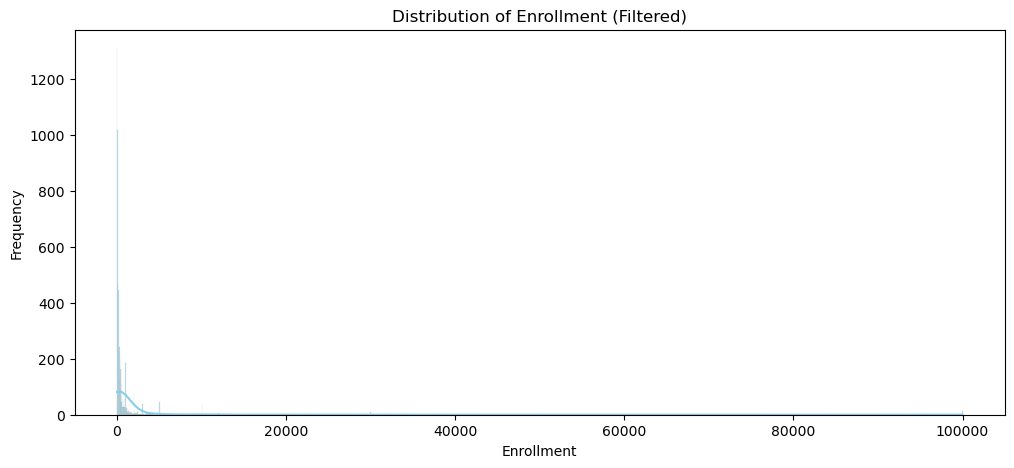

In [10]:
# Univariate Analysis - Numerical Columns
# Univariate Analysis - Numerical Columns with filtered Enrollment
print("Numerical Summary:")
print(df_cleaned.describe())

# Define an upper limit for Enrollment values for visualization (e.g., 99th percentile)
upper_limit = df_cleaned['Enrollment'].quantile(0.99)

plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned[df_cleaned['Enrollment'] <= upper_limit]['Enrollment'].dropna(), kde=True, color='skyblue')
plt.title("Distribution of Enrollment (Filtered)")
plt.xlabel("Enrollment")
plt.ylabel("Frequency")
plt.show()

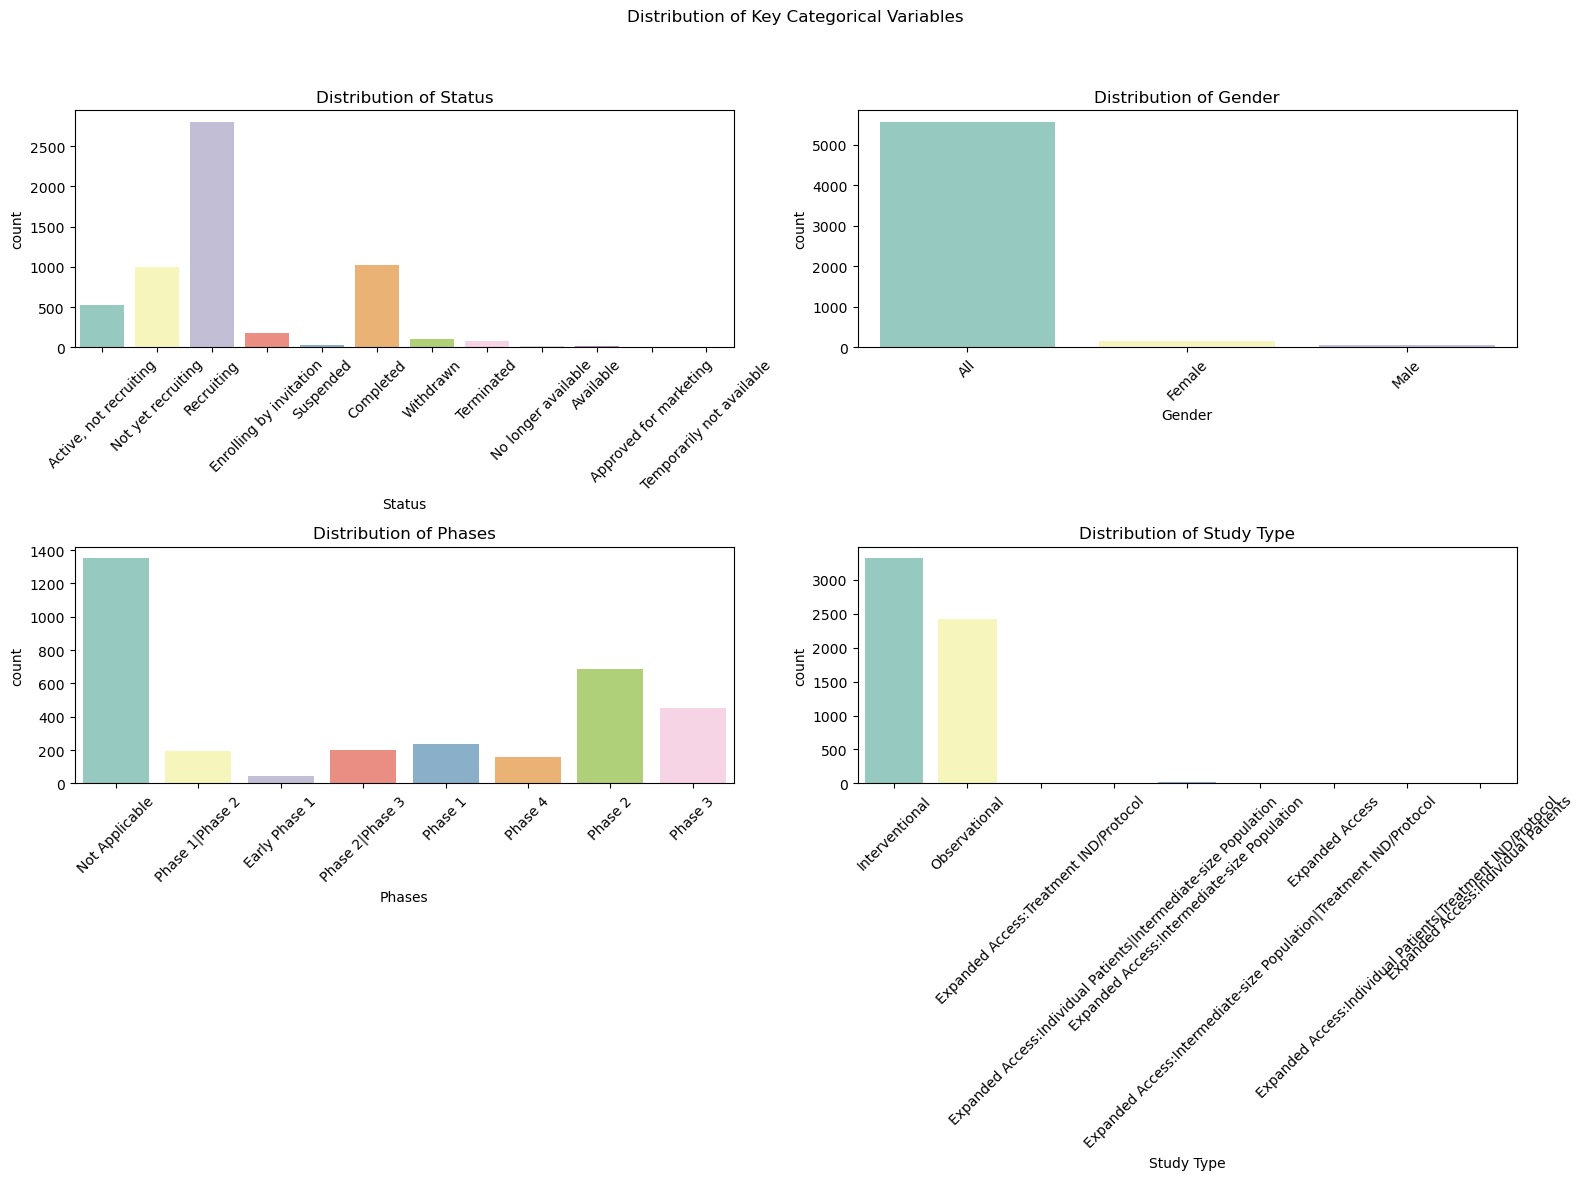

In [11]:
# Univariate Analysis - Categorical Columns
cat_columns = ['Status', 'Gender', 'Phases', 'Study Type']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Categorical Variables')

for ax, col in zip(axes.flatten(), cat_columns):
    sns.countplot(data=df_cleaned, x=col, ax=ax, palette="Set3")
    ax.set_title(f'Distribution of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



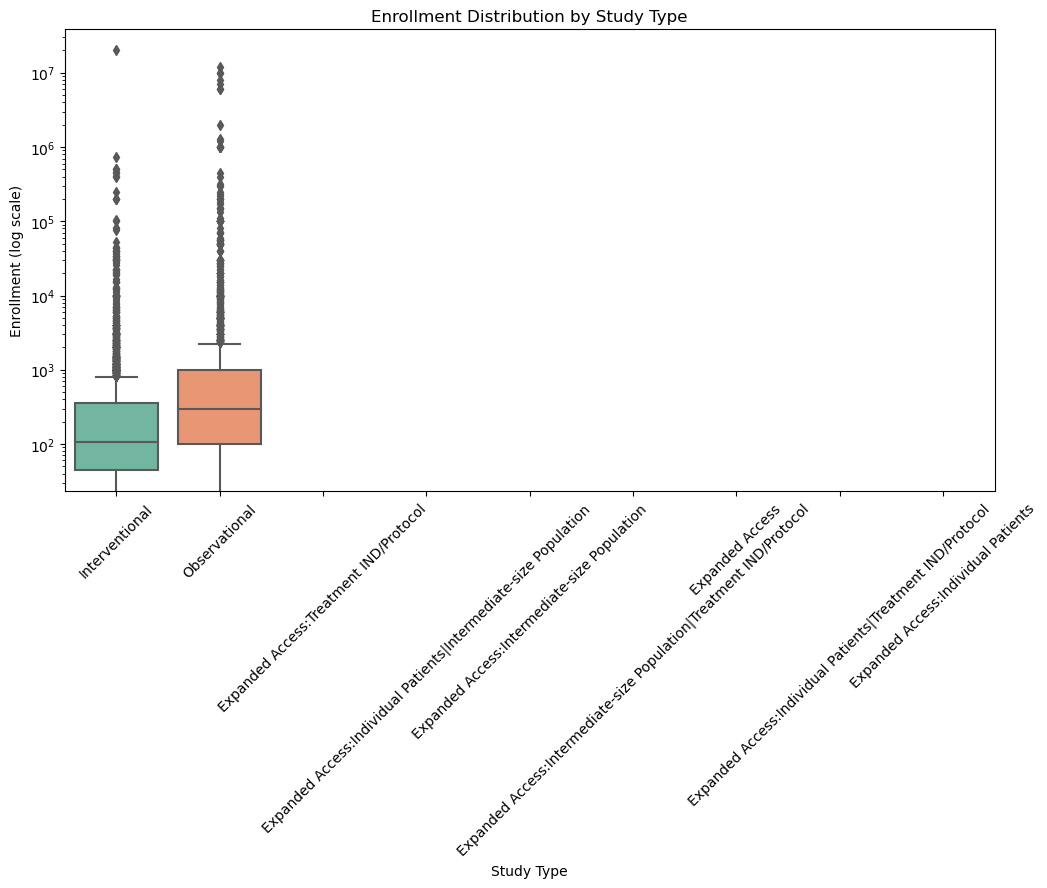

In [12]:
# Bivariate Analysis - Enrollment by Study Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Study Type', y='Enrollment', palette='Set2')
plt.yscale('log')  # Log scale for enrollment due to wide range
plt.title('Enrollment Distribution by Study Type')
plt.xlabel('Study Type')
plt.ylabel('Enrollment (log scale)')
plt.xticks(rotation=45)
plt.show()


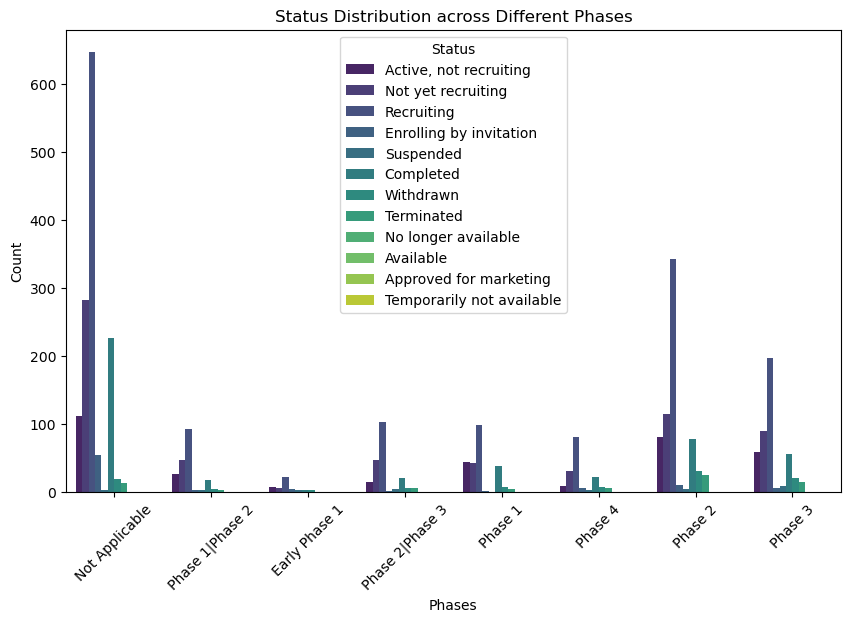

In [13]:
# Bivariate Analysis - Relationship between Status and Phases
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Phases', hue='Status', palette="viridis")
plt.title('Status Distribution across Different Phases')
plt.xlabel('Phases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



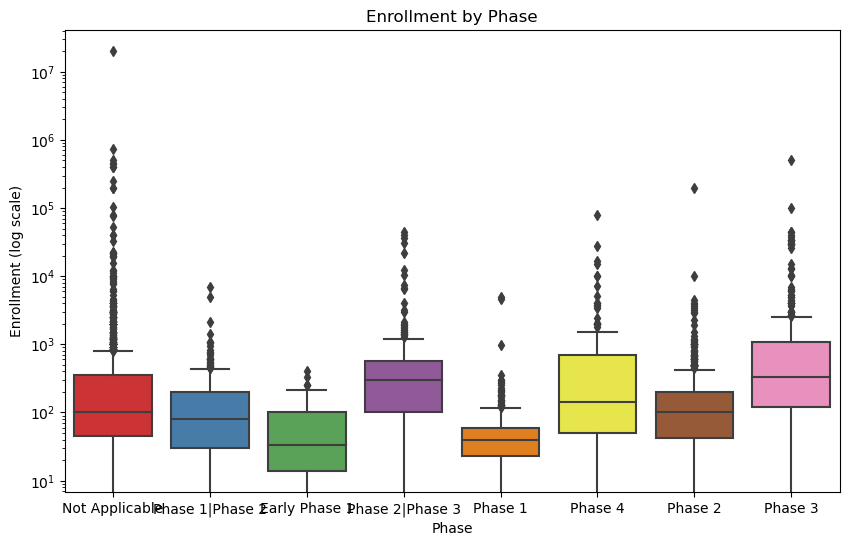

In [14]:
# Bivariate Analysis - Enrollment vs. Phases
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Phases', y='Enrollment', palette="Set1")
plt.yscale('log')
plt.title('Enrollment by Phase')
plt.xlabel('Phase')
plt.ylabel('Enrollment (log scale)')
plt.show()

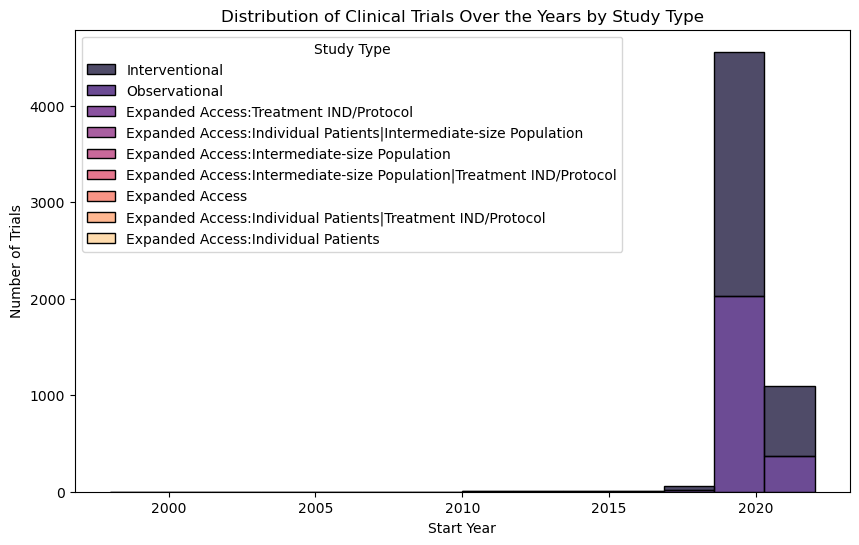

In [15]:
# Bivariate Analysis - Start Date and Study Type
df_cleaned['Start Year'] = df_cleaned['Start Date'].dt.year
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Start Year', hue='Study Type', multiple='stack', palette='magma')
plt.title('Distribution of Clinical Trials Over the Years by Study Type')
plt.xlabel('Start Year')
plt.ylabel('Number of Trials')
plt.show()


In [16]:
# Time Series Analysis
# Grouping data by month and year for time series analysis
df_cleaned['Start Month'] = df_cleaned['Start Date'].dt.to_period('M')
monthly_trials = df_cleaned.groupby('Start Month').size()


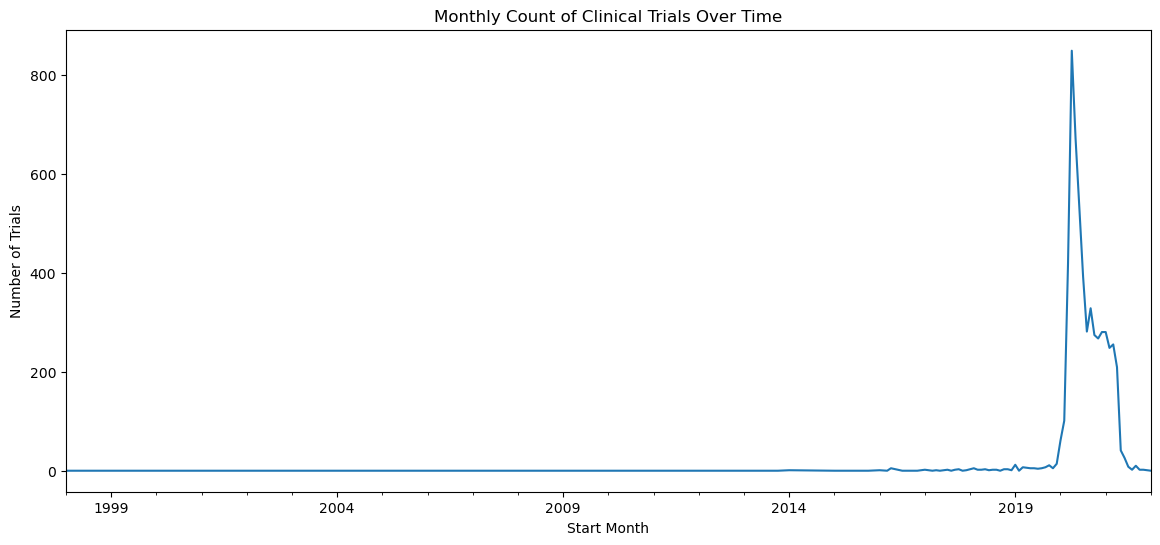

In [17]:
# Plotting time series of monthly trial count
plt.figure(figsize=(14, 6))
monthly_trials.plot()
plt.title("Monthly Count of Clinical Trials Over Time")
plt.xlabel("Start Month")
plt.ylabel("Number of Trials")
plt.show()

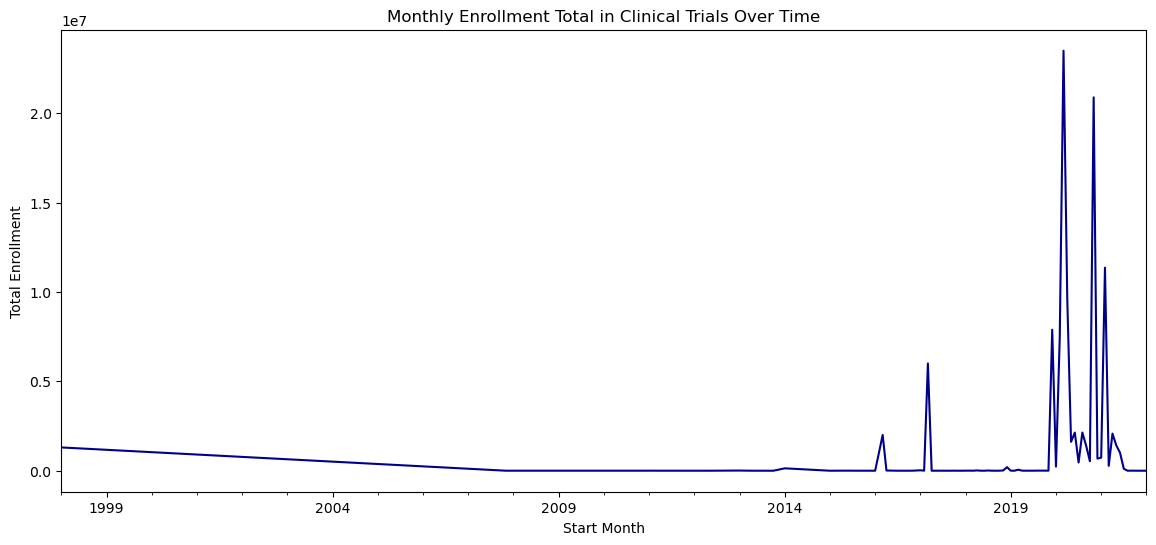

EDA Complete with Time Series Analysis.


In [18]:
# Time Series Analysis - Enrollment Trends over Time
monthly_enrollment = df_cleaned.groupby('Start Month')['Enrollment'].sum()

plt.figure(figsize=(14, 6))
monthly_enrollment.plot(color='darkblue')
plt.title("Monthly Enrollment Total in Clinical Trials Over Time")
plt.xlabel("Start Month")
plt.ylabel("Total Enrollment")
plt.show()

print("EDA Complete with Time Series Analysis.")

In [19]:
# Save the cleaned data
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)